***

<h1><center>Investigating the Impact of COVID-19 on the U.S. Airline Industry</center></h1>

***

![Grounded Planes](https://media-exp1.licdn.com/dms/image/C4D22AQEsDB6h6thR7Q/feedshare-shrink_800/0/1585040408957?e=1613001600&v=beta&t=qhL_IjDUjA0Wkq2lsmaPgqM7GrcLi9XpMMrOCZDI_-A)

*** 
## Table of Contents
* <a href='#I. Introduction'>I. Introduction</a>

* <a href='#II. Research Questions'>II. Research Questions</a>

* <a href='#III. Department of Transportation Analysis'>III. Department of Transportation Analysis</a>

    * <a href='#A. Research Question #1'>A. Research Question #1</a>
        * <a href='#a. Description of Department of Transportation Data'>a. Description of Data</a>
        * <a href='#b. Impact of COVID-19 on Key Airline Performance Metrics'>b. Impact of COVID-19 on Key Airline Performance Metrics</a>
        * <a href='#c. Number of Passengers Comparison for 4 Major Airlines'>c. Number of Passengers Comparison for 4 Major Airlines</a>
    * <a href='#B. Research Question #2'>B. Research Question #2</a>
        * <a href='#a. Change in Number of Passengers per Flight by State'>a. Change in Number of Passengers per Flight by State</a>
        * <a href='#b. Change in Average Fare Price by State'>b. Change in Average Fare Price by State</a>

* <a href='#IV. Twitter Analysis'>IV. Twitter Analysis</a>
    * <a href='#A. Research Question #3'>A. Research Question #3</a>
        * <a href='#a. Description of Twitter Data'>a. Description of Data</a>
        * <a href='#b. Cluster Analysis of Tweets about Airlines'>b. Cluster Analysis of Tweets about Airlines</a>
        * <a href='#c. Comparison of Tweet Content Before and During COVID-19'>c. Comparison of Tweet Content Before and During COVID-19</a>
        * <a href='#d. Measuring Sentiment Toward Airlines Over Time'>d. Measuring Sentiment Toward Airlines Over Time</a>
 
    * <a href='#B. Research Question #4'>B. Research Question #4</a>
        * <a href='#a. Frequency of Tweets about Airlines Over Time'>a. Frequency of Tweets about Airlines Over Time</a>
        * <a href='#b. Topics of Tweets during Inception of COVID-19 Crisis'>b. Topics of Tweets during Inception of COVID-19 Crisis</a>

* <a href='#V. Conclusion'>V. Conclusion</a>

***

<a id='I. Introduction'></a>
## I. Introduction
***

The COVID-19 pandemic has upended households, communities, and societies. The global economy has plunged into a deep recession as entire industries have been thrust into upheaval.

One of the biggest casualties of the crisis has been the travel and tourism industry. Indeed, [analysis](https://www.mckinsey.com/industries/travel-logistics-and-transport-infrastructure/our-insights/covid-19-tourism-spend-recovery-in-numbers "McKinsey Travel Report") from McKinsey & Company indicates that global tourism expenditure may be up to $8.1 trillion lower than pre-COVID-19 projections.

Accordingly, the U.S. airline industry has suffered. This analysis seeks to provide a deeper understanding on the extent of the impact, and to provide a potential cause for the disruption in the industry.
***

<a id='II. Research Questions'></a>
## II. Research Questions
***

<a id='Research Questions'></a>

This analysis has been divided into 4 major topics, as follows:
1. How have **key airline metrics** been impacted in **aggregate**?

2. How has the **impact** on the airline industry differed **by state**?

3. How has **overall perception** towards the airline industry changed?

4. What **caused** a shift in perception?


The first half of the report will use Department of Transportation data to address questions 1 and 2.

The second half of the report will use Twitter data to address questions 3 and 4.

***

<a id='III. Department of Transportation Analysis'></a>
## III. Department of Transportation Analysis
***

<a id='A. Research Question #1'></a>
### A. Research Question #1
***

<a id='a. Description of Department of Transportation Data'></a>
#### a. Description of Data
***

Through the Bureau of Transportation Statistics, the U.S. Department of Transportation provides a plethora of publicly availably data. One such dataset comes from the T-100 data bank, which contains data reported by certificated U.S. air carriers.

Two airline datasets are used. The first is the [T-100 Domestic Segment](https://www.transtats.bts.gov/Tables.asp?DB_ID=110&DB_Name=Air%20Carrier%20Statistics%20%28Form%2041%20Traffic%29-%20%20U.S.%20Carriers&DB_Short_Name=Air%20Carriers) (U.S. Carriers) dataset, which reports a variety of statistics related to U.S. domestic non-stop flight segment data. This dataset is reported monthly.

The second is the [Average Domestic Airline Itinerary Fares](https://www.transtats.bts.gov/AverageFare/) by Origin City dataset. This dataset is reported quarterly.

Data are retrieved from October (Quarter 4) 2019 to June (Quarter 2) 2020.

The data are ingested and cleaned below.
***

In [1]:
from datetime import datetime
import folium
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

path = '../Final Project Datasets/'
os.chdir(path)
pd.set_option('display.max_columns', None)

### Flight segment data

segment_data_2019 = pd.read_csv('336742041_T_T100D_SEGMENT_US_CARRIER_ONLY_2019.csv')

segment_data_2020 = pd.read_csv('336737944_T_T100D_SEGMENT_US_CARRIER_ONLY_2020.csv')

segment_data = pd.concat([segment_data_2019, segment_data_2020], ignore_index = True)

segment_data = segment_data.drop(['Unnamed: 45'], axis = 1)

# Check for null values
segment_data.isnull().values.sum() # 0 NA values

# Convert columns with incorrect variable types
for col in segment_data:
    if segment_data[col].dtypes == 'int64':
        segment_data[col] = segment_data[col].astype(str)

### Average fare data

fare_q4_2019 = pd.read_csv('AverageFare_Q4_2019.csv', header = 1)

fare_q4_2019 = fare_q4_2019[['2019 Passenger Rank', 'Airport Name', 'City Name', 'State Name', 'Average Fare ($)', '2019 Passengers (10% sample)']]

fare_q4_2019['Quarter'] = '2019_Q4'

fare_q2_2020 = pd.read_csv('AverageFare_Q2_2020.csv', header = 1)

fare_q2_2020 = fare_q2_2020[['2019 Passenger Rank', 'Airport Name', 'City Name', 'State Name', 'Average Fare ($)', '2019 Passengers (10% sample)']]

fare_q2_2020['Quarter'] = '2020_Q2'

average_fare = pd.concat([fare_q4_2019, fare_q2_2020], ignore_index = True)

# Check for null values
average_fare.isna().values.sum() # 28 NA values. Upon inspection, these rows are irrelevant and can be removed
average_fare = average_fare.dropna()

# Filter data for Q4 2019 to Q2 2020
segment_data_filtered = segment_data[((segment_data['YEAR'] == '2019') & (segment_data['QUARTER'] == '4')) 
| ((segment_data['YEAR'] == '2020') & (segment_data['QUARTER'] == '1'))
| ((segment_data['YEAR'] == '2020') & (segment_data['QUARTER'] == '2'))]

segment_data_filtered = segment_data_filtered.reset_index()
segment_data_filtered = segment_data_filtered.drop(['index'], axis = 1)

### Feature engineering

# Scale variables by number of flight departures
segment_data_filtered['payload_per_departure'] = segment_data_filtered['PAYLOAD'] / segment_data_filtered['DEPARTURES_PERFORMED']
segment_data_filtered['seats_per_departure'] = segment_data_filtered['SEATS'] / segment_data_filtered['DEPARTURES_PERFORMED']
segment_data_filtered['passengers_per_departure'] = segment_data_filtered['PASSENGERS'] / segment_data_filtered['DEPARTURES_PERFORMED']

segment_data_filtered['freight_per_departure'] = segment_data_filtered['FREIGHT'] / segment_data_filtered['DEPARTURES_PERFORMED']
segment_data_filtered['mail_per_departure'] = segment_data_filtered['MAIL'] / segment_data_filtered['DEPARTURES_PERFORMED']
segment_data_filtered['distance_per_departure'] = segment_data_filtered['DISTANCE'] / segment_data_filtered['DEPARTURES_PERFORMED']

# Convert minutes to hours
segment_data_filtered['hours_ramp_time_per_departure'] = (segment_data_filtered['RAMP_TO_RAMP'] / 60) / segment_data_filtered['DEPARTURES_PERFORMED']
segment_data_filtered['hours_air_time_per_departure'] = (segment_data_filtered['AIR_TIME'] / 60) / segment_data_filtered['DEPARTURES_PERFORMED']

# Create date column
segment_data_filtered['date'] = segment_data_filtered['MONTH'] + '/' + segment_data_filtered['YEAR']
segment_data_filtered['date'] = pd.to_datetime(segment_data_filtered['date']).dt.to_period('M')

# Remove cancelled flights from dataset
cancelled_flights = segment_data_filtered[segment_data_filtered['DEPARTURES_PERFORMED'] == 0]
segment_df = segment_data_filtered[~segment_data_filtered.isin(cancelled_flights)].dropna(how = 'all')

# Remove flights with zero air_time from dataset
segment_df = segment_df[segment_df['AIR_TIME'] > 0]

# Remove flights with zero distance from dataset
segment_df = segment_df[segment_df['DISTANCE'] > 0]

### Remove outliers from variables

# Keep flights with < 300,000 pounds of payload from dataset
segment_df = segment_df[segment_df['payload_per_departure'] < 300000]

# Keep flights with < 150,000 pounds of freight from dataset
segment_df = segment_df[segment_df['freight_per_departure'] < 150000]

# Keep flights with < 5000 pounds of mail from dataset
segment_df = segment_df[segment_df['mail_per_departure'] < 5000]

# Keep flights with distance < 6000 miles from dataset
segment_df = segment_df[segment_df['distance_per_departure'] < 6000]

# Keep flights with ramp_time < 24 hours from dataset
segment_df = segment_df[segment_df['hours_ramp_time_per_departure'] < 24]

segment_df.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,payload_per_departure,seats_per_departure,passengers_per_departure,freight_per_departure,mail_per_departure,distance_per_departure,hours_ramp_time_per_departure,hours_air_time_per_departure,date
0,0.0,6.0,105660.0,420.0,250.0,0.0,0.0,654.0,813.0,621.0,G7,20500,GoJet Airlines LLC d/b/a United Express,07041,D,G7,GoJet Airlines LLC d/b/a United Express,2,2,10135,1013505,30135,ABE,"Allentown/Bethlehem/Easton, PA",PA,42,Pennsylvania,23,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,6,631,1,2019,4,11,2,F,17610.0,70.0,41.666667,0.0,0.0,109.0,2.258333,1.725000,2019-11
1,0.0,1.0,17610.0,70.0,65.0,0.0,0.0,1184.0,215.0,188.0,G7,20500,GoJet Airlines LLC d/b/a United Express,07041,D,G7,GoJet Airlines LLC d/b/a United Express,2,2,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11109,1110902,30189,COS,"Colorado Springs, CO",CO,8,Colorado,82,6,631,1,2019,4,11,3,F,17610.0,70.0,65.000000,0.0,0.0,1184.0,3.583333,3.133333,2019-11
2,0.0,1.0,17610.0,70.0,67.0,0.0,0.0,1167.0,214.0,198.0,G7,20500,GoJet Airlines LLC d/b/a United Express,07041,D,G7,GoJet Airlines LLC d/b/a United Express,2,2,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14288,1428805,34288,PUB,"Pueblo, CO",CO,8,Colorado,82,6,631,1,2019,4,11,3,F,17610.0,70.0,67.000000,0.0,0.0,1167.0,3.566667,3.300000,2019-11
3,0.0,2.0,45500.0,152.0,69.0,0.0,0.0,661.0,250.0,205.0,G7,20500,GoJet Airlines LLC d/b/a United Express,07041,D,G7,GoJet Airlines LLC d/b/a United Express,2,2,10529,1052906,30529,BDL,"Hartford, CT",CT,9,Connecticut,11,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52,6,638,1,2019,4,11,2,F,22750.0,76.0,34.500000,0.0,0.0,330.5,2.083333,1.708333,2019-11
4,0.0,2.0,35220.0,140.0,70.0,0.0,0.0,196.0,149.0,89.0,G7,20500,GoJet Airlines LLC d/b/a United Express,07041,D,G7,GoJet Airlines LLC d/b/a United Express,2,2,11003,1100303,31003,CID,"Cedar Rapids/Iowa City, IA",IA,19,Iowa,61,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,6,631,1,2019,4,11,1,F,17610.0,70.0,35.000000,0.0,0.0,98.0,1.241667,0.741667,2019-11


In [2]:
segment_df.describe()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,payload_per_departure,seats_per_departure,passengers_per_departure,freight_per_departure,mail_per_departure,distance_per_departure,hours_ramp_time_per_departure,hours_air_time_per_departure
count,246934.000000,246934.000000,2.469340e+05,246934.000000,246934.000000,2.469340e+05,246934.000000,246934.000000,246934.000000,246934.000000,246934.000000,246934.000000,246934.000000,246934.000000,246934.000000,246934.000000,246934.000000,246934.000000
mean,21.765111,21.442373,7.237492e+05,2269.938550,1585.631318,6.901245e+04,1954.077976,719.505107,2682.762815,2197.481906,36008.594588,95.922524,60.071983,4419.273847,91.280162,224.027810,2.081438,1.735124
std,35.864454,33.467081,1.326430e+06,4495.476598,3496.902739,3.630656e+05,11405.025593,605.932151,4582.297205,3925.420780,36481.766492,73.041374,58.043304,15860.988714,368.931780,393.339135,1.250960,1.188333
min,0.000000,1.000000,2.000000e+02,0.000000,0.000000,0.000000e+00,0.000000,1.000000,5.000000,2.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.009928,0.074603,0.033333
25%,1.000000,2.000000,4.020000e+04,50.000000,7.000000,0.000000e+00,0.000000,255.000000,169.000000,138.000000,13500.000000,9.000000,2.533333,0.000000,0.000000,16.058824,1.200000,0.866667
50%,7.000000,8.000000,2.158550e+05,450.000000,209.000000,0.000000e+00,0.000000,588.000000,906.000000,720.000000,34446.000000,76.000000,45.592593,0.000000,0.000000,58.303846,1.846667,1.466667
75%,29.000000,28.000000,8.809580e+05,2712.000000,1698.000000,1.692000e+03,0.000000,1001.000000,3504.000000,2770.000000,43400.000000,161.538462,110.333333,116.666667,0.000000,237.500000,2.683333,2.290239
max,1108.000000,1108.000000,2.671393e+07,106752.000000,86623.000000,2.055480e+07,544711.000000,6089.000000,134319.000000,121617.000000,299493.857143,470.000000,363.000000,149959.200000,4993.597015,5812.000000,13.466667,13.450000


***
<a id='b. Impact of COVID-19 on Key Airline Performance Metrics'></a>
#### b. Impact of COVID-19 on Key Airline Performance Metrics
***

3 key metrics are examined in aggregate to answer <a href='#Research Questions'>Research Question 1:</a>
* The number of passengers per flight departure
* The hours of flight time per flight departure
* The weight of freight per flight departure

As can be seen from the graphs below, both the number of passengers and the hours of flight time decreased precipitously, whereas the amount of freight increased over the same time horizon. This suggests that as fewer passengers sought air travel, the airlines shifted their business model to transport more cargo.
***

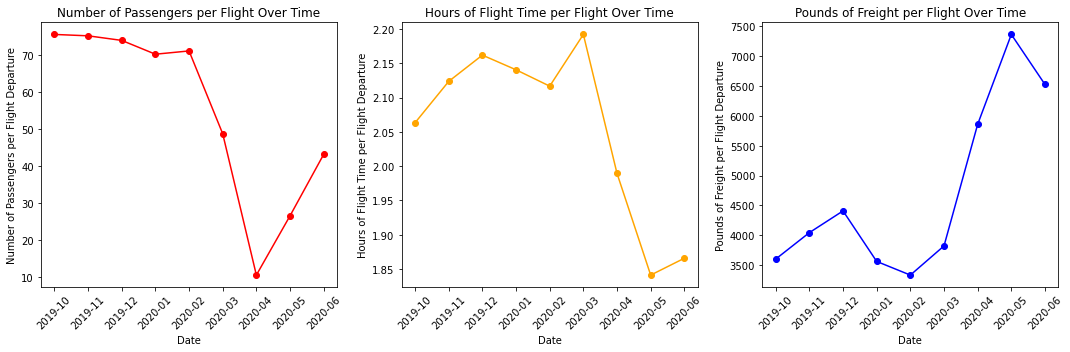

In [3]:
# Group flights by month
monthly_mean = segment_df.groupby(['date'], as_index = False).mean()
monthly_mean['date'] = monthly_mean['date'].dt.strftime("%Y-%m")

plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
plt.plot(monthly_mean['date'], monthly_mean['passengers_per_departure'], marker = 'o', color = 'red')
plt.xlabel('Date')
plt.ylabel('Number of Passengers per Flight Departure')
plt.title('Number of Passengers per Flight Over Time')
plt.xticks(rotation = 45)

plt.subplot(1, 3, 2)
plt.plot(monthly_mean['date'], monthly_mean['hours_ramp_time_per_departure'], marker = 'o', color = 'orange')
plt.xlabel('Date')
plt.ylabel('Hours of Flight Time per Flight Departure')
plt.title('Hours of Flight Time per Flight Over Time')
plt.xticks(rotation = 45)

plt.subplot(1, 3, 3)
plt.plot(monthly_mean['date'], monthly_mean['freight_per_departure'], marker = 'o', color = 'blue')
plt.xlabel('Date')
plt.ylabel('Pounds of Freight per Flight Departure')
plt.title('Pounds of Freight per Flight Over Time')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

***
<a id='c. Number of Passengers Comparison for 4 Major Airlines'></a>
#### c. Number of Passengers Comparison for 4 Major Airlines
***

The same passenger analysis was conducted for the 4 major U.S. airline carriers, which control about 2/3 of market share. As seen below, the trends in the graphs are almost identical, indicating that the impact to the airline industry was widespread and not limited to a specific airline.
***

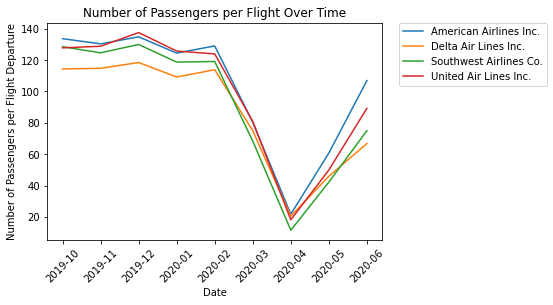

In [4]:
# Select 4 major airlines (United, American, Delta, and Southwest)
segment_df_airlines = segment_df[(segment_df['UNIQUE_CARRIER'] == 'UA') | 
                                 (segment_df['UNIQUE_CARRIER'] == 'AA') |
                                (segment_df['UNIQUE_CARRIER'] == 'DL') | 
                                (segment_df['UNIQUE_CARRIER'] == 'WN') ]

# Group flights by date and airline
monthly_airline_mean = segment_df_airlines.groupby(['date', 'CARRIER_NAME'], as_index = False).mean()
monthly_airline_mean['date'] = monthly_airline_mean['date'].dt.strftime("%Y-%m")

monthly_airline_pivot = monthly_airline_mean.pivot(index = 'date', columns = 'CARRIER_NAME', 
                                                   values = 'passengers_per_departure')

monthly_airline_pivot.plot()
plt.xlabel('Date')
plt.ylabel('Number of Passengers per Flight Departure')
plt.title("Number of Passengers per Flight Over Time")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation = 45)
plt.show()

***
<a id='B. Research Question #2'></a>
### B. Research Question #2
***

<a id='a. Change in Number of Passengers per Flight by State'></a>
#### a. Change in Number of Passengers per Flight by State
***

To answer <a href='#Research Questions'>Research Question 2</a>, the number of passengers per flight is broken down by state. This can provide insight into whether the impact to travel is uniform or whether differences exist by location. As seen below, while all states experienced a decline in travel, by far the most impacted was Hawaii. Its status as an island and as a traditional hub for tourism provides a unique case study for the impact to the travel industry.
***

In [5]:
# Group flights by date and state
state_change = segment_df.groupby(['date', 'DEST_STATE_ABR'], as_index = False).mean()
state_change = state_change[['date', 'DEST_STATE_ABR', 'passengers_per_departure']]
state_change['date'] = state_change['date'].dt.strftime("%Y-%m")

# Compare flights at beginning of period (i.e. pre-COVID) to flights at end of period (during COVID)
state_change = state_change[(state_change['date'] == '2019-10') | (state_change['date'] == '2020-06')]

state_change_pivot = state_change.pivot(index = 'DEST_STATE_ABR', columns = 'date', 
                                                   values = 'passengers_per_departure')
state_change_pivot = state_change_pivot.reset_index()

# Calculate percent change in number of passengers per flight
state_change_pivot['percent_change'] = 100*(state_change_pivot['2020-06'] - state_change_pivot['2019-10']) / state_change_pivot['2019-10']

# Note: Delaware is an outlier as it is the only U.S. state without any regular scheduled passenger flights. 
# Thus, the mean decline is imputed.
mean_percent_change = state_change_pivot['percent_change'].mean()
state_change_pivot.loc[state_change_pivot['DEST_STATE_ABR'] == 'DE', 'percent_change'] = mean_percent_change

# Based on https://python-graph-gallery.com/292-choropleth-map-with-folium/
 
# Load the shape of the zone (US states)
# Original file extracted from https://github.com/python-visualization/folium/tree/master/examples/data
state_geo = 'us-states.json'

bins = [num for num in range(-100, 125, 25)]
   
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=3)
 
# Add the color for the chloropleth:
m.choropleth(
    geo_data = state_geo,
    name = 'choropleth',
    data = state_change_pivot,
    columns = ['DEST_STATE_ABR', 'percent_change'],
    key_on = 'feature.id',
    fill_color = 'RdBu',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name ='% Change in Passengers per Flight from 10/2019 to 06/2020',
    bins = bins
)

folium.LayerControl().add_to(m)

m

/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


***
<a id='b. Change in Average Fare Price by State'></a>
#### b. Change in Average Fare Price by State
***

Finally, the change in average flight fare price is also examined by state. With the exception of Maine, all states experienced a decline in fare price, and half of the states experienced a decline larger than 25%. This suggests that the impact to the airline industry was widespread, yet some states were impacted more than others. 
***

In [6]:
# Group average fare price ($) by quarter and state
average_fare_state = average_fare.groupby(['Quarter', 'State Name'], as_index = False).mean()

average_fare_pivot = average_fare_state.pivot(index = 'State Name', columns = 'Quarter', 
                                                   values = 'Average Fare ($)')
average_fare_pivot = average_fare_pivot.reset_index()

# Compare percentage change between Q2 2020 and Q4 2019 (data is provided quarterly)
average_fare_pivot['percent_change'] = 100*(average_fare_pivot['2020_Q2'] - average_fare_pivot['2019_Q4']) / average_fare_pivot['2019_Q4']

# Note: Delaware is an outlier as it is the only U.S. state without any regular scheduled passenger flights. 
# Thus, the mean percent_change is imputed.
mean_percent_change = average_fare_pivot['percent_change'].mean()

average_fare_pivot.loc[len(average_fare_pivot)] = ['DE', mean_percent_change, mean_percent_change, mean_percent_change]

## NH average fare for Q2 2020 is skewed by 1 airport. Thus, the mean percent_change is imputed.
average_fare_pivot.loc[average_fare_pivot['State Name'] == 'NH', 'percent_change'] = mean_percent_change

# Based on https://python-graph-gallery.com/292-choropleth-map-with-folium/
 
# Load the shape of the zone (US states)
# Original file extracted from https://github.com/python-visualization/folium/tree/master/examples/data

bins = [num for num in range(-50, 75, 25)]

state_geo = 'us-states.json'
 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=4)
 
# Add the color for the chloropleth:
m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=average_fare_pivot,
    columns=['State Name', 'percent_change'],
    key_on='feature.id',
    fill_color='RdBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='% Change in Average Fare Price between 2019 Q4 and 2020 Q2',
    bins = bins
)
folium.LayerControl().add_to(m)

m

***
<a id='IV. Twitter Analysis'></a>
## IV. Twitter Analysis
***

<a id='A. Research Question #3'></a>
### A. Research Question #3
***

<a id='a. Description of Twitter Data'></a>
#### a. Description of Data
***

Twitter is unparalleled in its ability to capture societal opinions in real-time. For this reason, historical Twitter data are mined to gauge the perception toward the airline industry before and during the pandemic.

As the Twitter API has strict tweet retrieval limits, the Python package Twint is used to capture data from October 2019 to June 2020. All tweets retrieved contain the keyword 'airlines'. The geolocation is limited to the continental United States to provide a consistent U.S. focused analysis.

The data are ingested and cleaned below.
***

In [7]:
from bokeh.io import show, output_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from gensim.models import CoherenceModel
from gensim.models import LdaMulticore
from gensim.models import Word2Vec
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
from IPython.core.display import display, HTML
from nltk.stem import WordNetLemmatizer
from PIL import Image
from sklearn.manifold import TSNE
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import gensim.corpora as corpora
import matplotlib.pyplot as plt
import nest_asyncio
import nltk
import numpy as np
import preprocessor as p
import pyLDAvis.gensim
import string
import twint
nltk.download('wordnet')

display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

[nltk_data] Downloading package wordnet to /Users/ambiv/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
# Takes ~5 minutes to extract historical Twitter data

nest_asyncio.apply()

# Configure
c = twint.Config()
c.Search = 'airlines'
c.Lang = 'en'
c.Geo = '39.8283,-98.5795,2000mi'
c.Since = '2019-10-01'
c.Until = '2020-07-01'
c.Limit = 50000
c.Output = './airlines_tweets.csv'
c.Store_csv = True

# Run
# twint.run.Search(c)

In [9]:
airlines_tweets = pd.read_csv('airlines_tweets.csv')

airlines_tweets_df = airlines_tweets[['date', 'tweet', 'replies_count', 'retweets_count', 'likes_count']]

airlines_tweets_df = airlines_tweets_df[airlines_tweets_df['date'] != '2020-07-01']

airlines_tweets_df['date'] = pd.to_datetime(airlines_tweets_df['date'])

airlines_tweets_df.isnull().values.sum() # No NA values

### Apply Twitter pre-processing library
p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.EMOJI, p.OPT.SMILEY)

# Adapted from https://www.kaggle.com/sreejiths0/efficient-tweet-preprocessing

def preprocess_tweet(row):
    text = row['tweet']
    text = p.clean(text)
    return text

def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

# Remove URLs, mentions (i.e. @username), reserved words (e.g. RT), emojis, and smileys
airlines_tweets_df['text'] = airlines_tweets_df.apply(preprocess_tweet, axis=1)

# Remove duplicate tweets
airlines_tweets_df = airlines_tweets_df.drop_duplicates(subset = 'text').reset_index()
airlines_tweets_df = airlines_tweets_df.drop(['index'], axis = 1)

# Remove stopwords
airlines_tweets_df['cleaned_text'] = airlines_tweets_df.apply(stopword_removal, axis=1)

# Set text to lowercase
airlines_tweets_df['cleaned_text'] = airlines_tweets_df['cleaned_text'].str.lower()

punctuation_string = string.punctuation.replace("-", "")
punctuation_string = punctuation_string.replace("'", "")

# Remove punctuation from tweet except for hyphens and single quotes
airlines_tweets_df['cleaned_text'] = airlines_tweets_df['cleaned_text'].str.translate(str.maketrans('', '', punctuation_string))

airlines_tweets_df.head()

,date,tweet,replies_count,retweets_count,likes_count,text,cleaned_text
0,2020-06-30,"Alrighty yeah, I’m ready to go back to the air...",0,0,0,"Alrighty yeah, Im ready to go back to the airl...",alrighty yeah im ready airline industry guy ha...
1,2020-06-30,.@AlaskaAir joins the growing list of airlines...,0,1,6,. joins the growing list of airlines getting t...,joins growing list airlines getting tough mas...
2,2020-06-30,"Similar to ORH... 3 airlines, 5 daily flights ...",0,0,0,"Similar to ORH... 3 airlines, 5 daily flights ...",similar orh 3 airlines 5 daily flights pre-cov...
3,2020-06-30,American Airlines knows why we fly 😬 Pray for ...,4,0,5,American Airlines knows why we fly Pray for me,american airlines knows fly pray
4,2020-06-30,"1982 United Airlines ""Hawaii"" TV Commercial h...",0,0,0,"1982 United Airlines ""Hawaii"" TV Commercial via",1982 united airlines hawaii tv commercial


<a id='b. Cluster Analysis of Tweets about Airlines'></a>
#### b. Cluster Analysis of Tweets about Airlines
***

As a sanity check, the tweets are clustered to determine whether the content of the tweets truly is related to airlines. As seen below, 1 large cluster exists, indicating that the tweets are genuine and not unrelated 'spam'. Thus, these tweets can be used to reflect sentiments toward the airline industry as a whole. This conclusion serves as a prelude to the next analysis.
***

<ipython-input-10-5614212a616e>:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


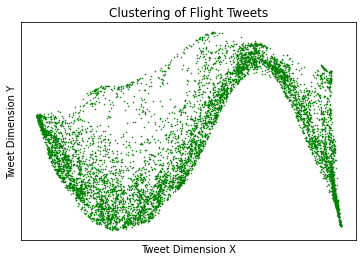

In [10]:
### Reduce dimension of word vectors of tweets, since cannot visualize in high-dimension

# Create list of individual words in each tweet
tokenised_tweets = [tweet.split() for tweet in airlines_tweets_df['cleaned_text']]

# Train Word2Vec model on tokenised tweets corpus
model = Word2Vec(tokenised_tweets, min_count = 5)

words = list(model.wv.vocab)

word_counts = []
for w in model.wv.vocab:
     word_counts.append(model.wv.vocab[w].count)

# Calculate word embeddings from tweets (i.e. the numeric representation of the words) 
X = model[model.wv.vocab]

tsne = TSNE(n_components = 2, init = 'pca', random_state = 0, n_iter = 250)  
X_tsne = tsne.fit_transform(X)

# Function from lecture notes:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    X = pd.DataFrame(X, columns=['x1','x2'])

    X.plot.scatter('x1','x2', c='green', s=0.3)

    plt.xticks([]), plt.yticks([])
    plt.xlabel('Tweet Dimension X')
    plt.ylabel('Tweet Dimension Y')
    
    if title is not None:
        plt.title(title)

plot_embedding(X_tsne, title = "Clustering of Flight Tweets")
plt.show()

***
<a id='c. Comparison of Tweet Content Before and During COVID-19'></a>
#### c. Comparison of Tweet Content Before and During COVID-19
***

To answer <a href='#Research Questions'>Research Question 3,</a> tweets are used as a proxy to represent public opinion. If perception toward the airline industry has changed, then the content of airline tweets would differ when comparing a time period before and during the pandemic. As seen below, the COVID-19 pandemic has introduced terms such as 'refund', 'mask', and 'bailout' to the lexicon.
***

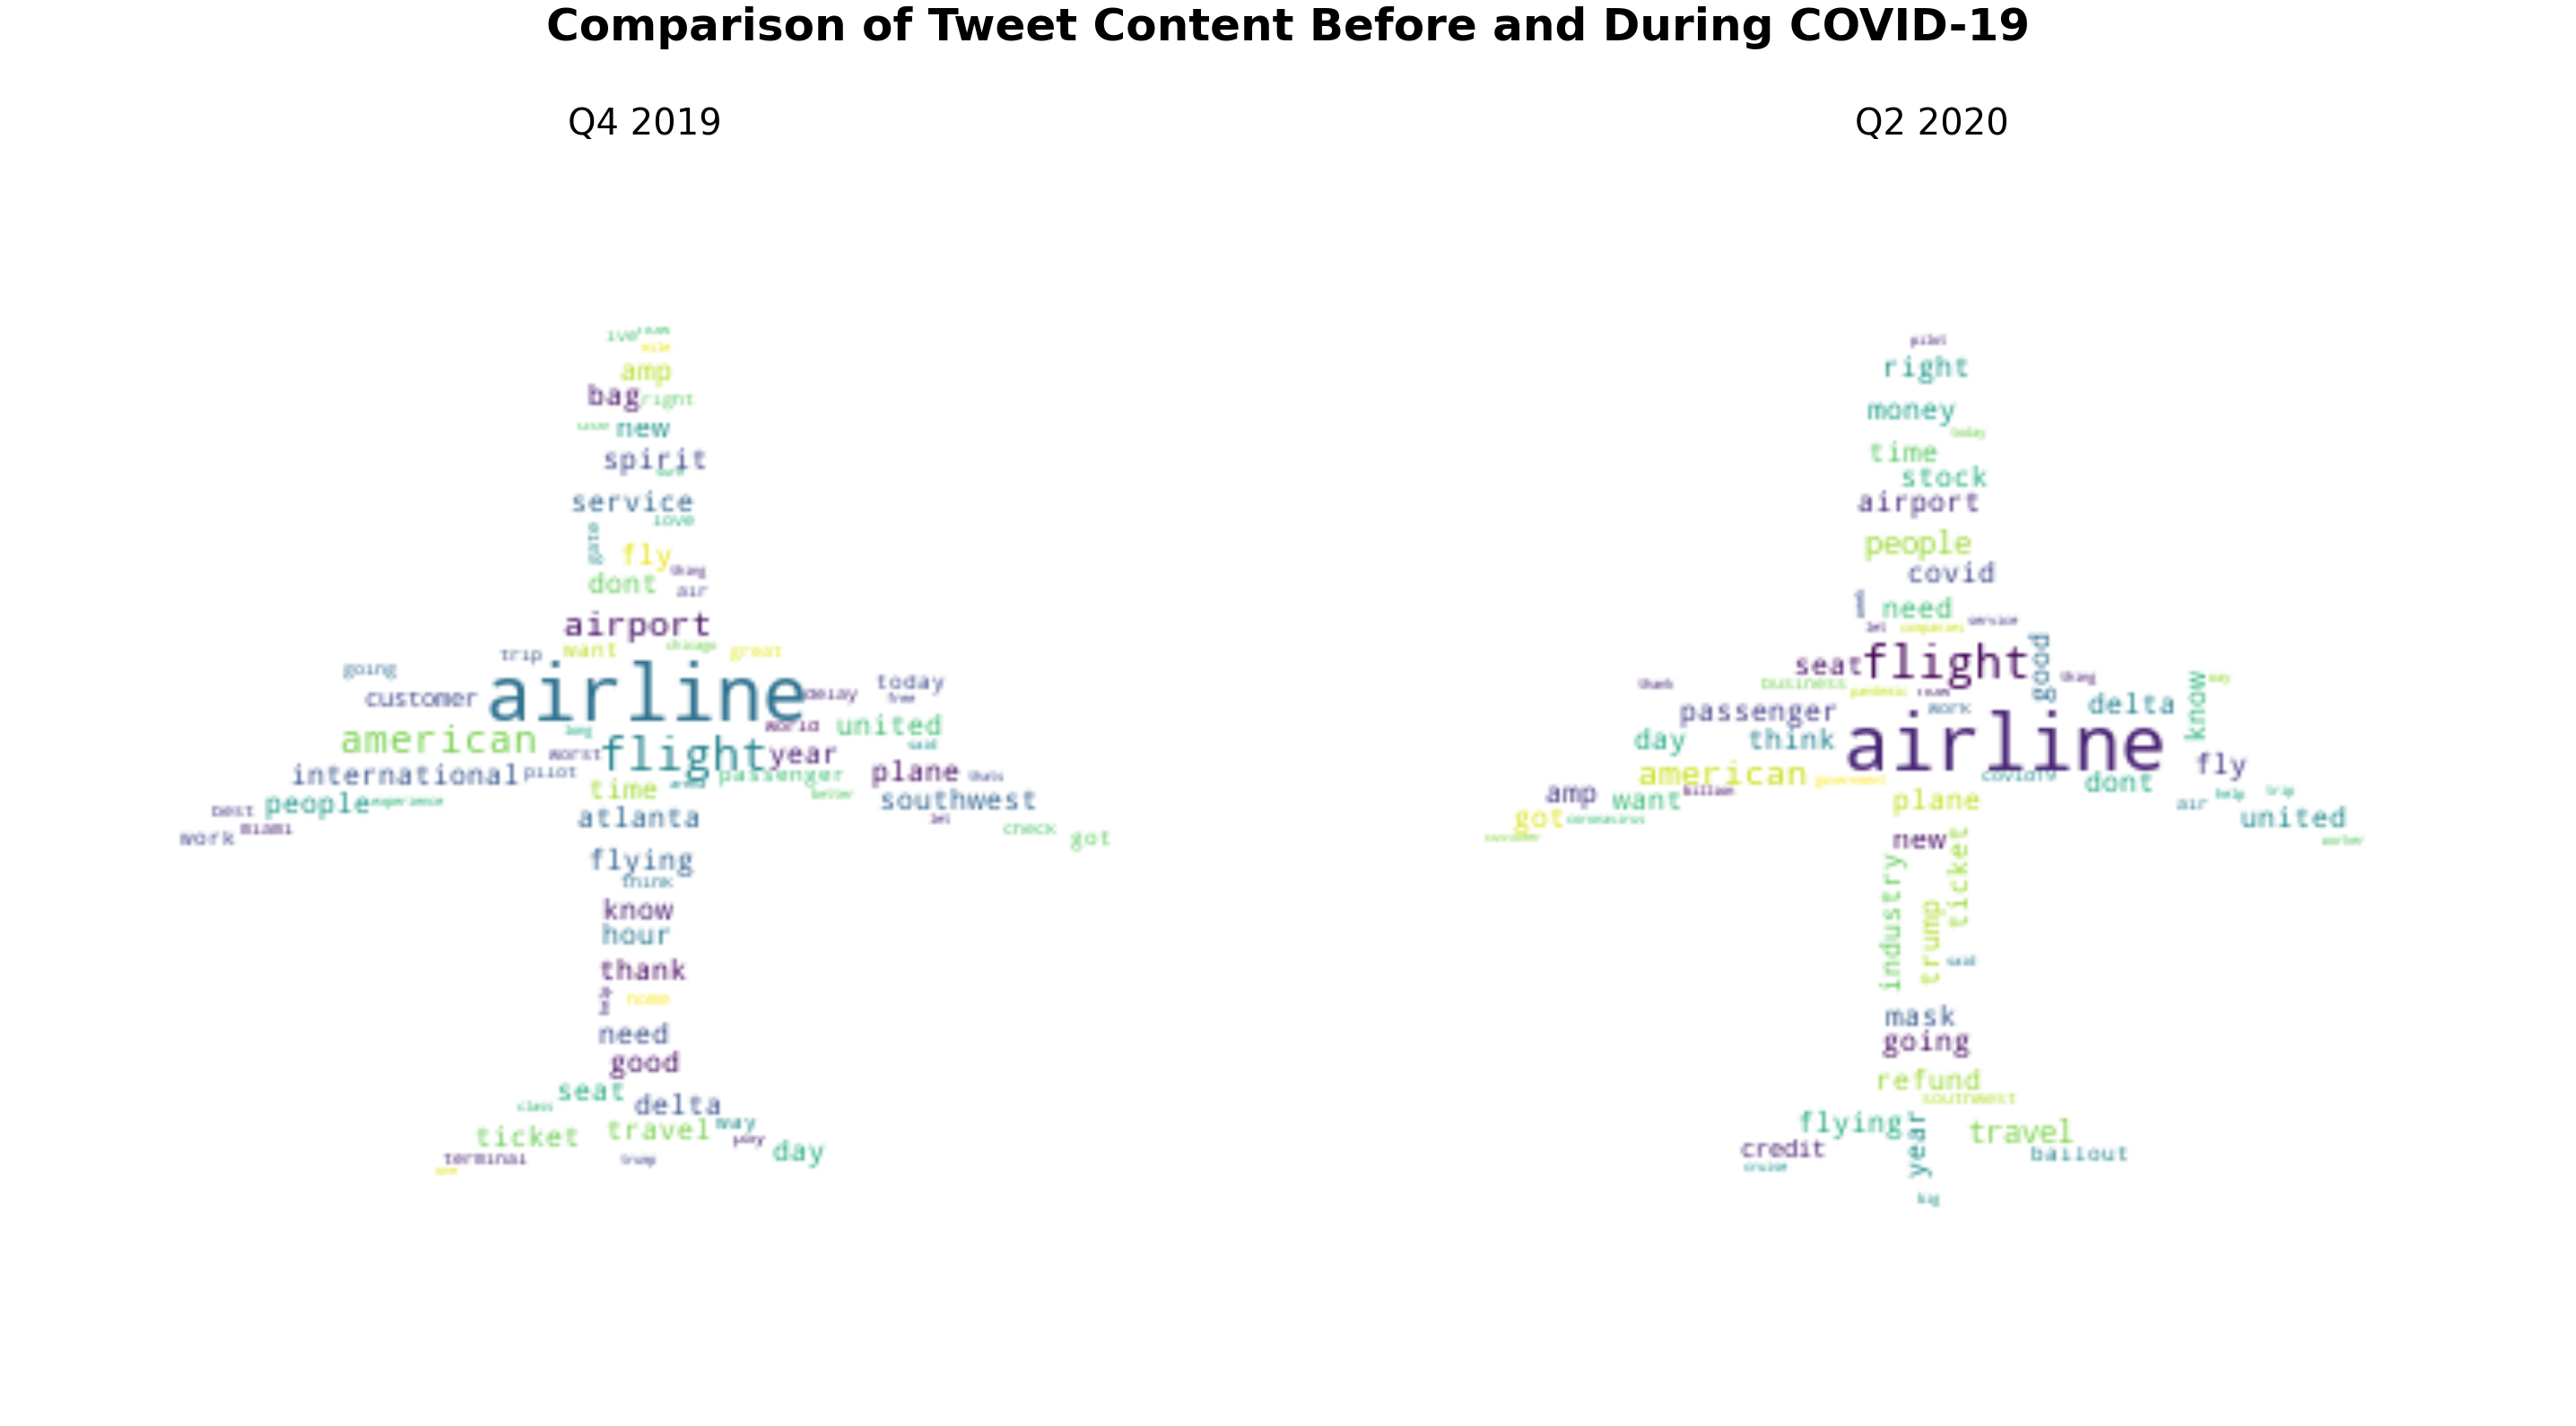

In [11]:
# Get tweets from Q4 2019 and Q2 2020
q2_2020_tweets = airlines_tweets_df[airlines_tweets_df['date'] >= datetime(2020, 4, 1)]

q4_2019_tweets = airlines_tweets_df[(airlines_tweets_df['date'] < datetime(2020, 1, 1)) & 
                                    (airlines_tweets_df['date'] >= datetime(2019, 10, 1))]

df_names = [q4_2019_tweets, q2_2020_tweets]
plot_title_names = ['Q4 2019', 'Q2 2020']

plt.figure(figsize=[40, 40])

for i in range(len(df_names)):

    tweet_text = " ".join(text for text in df_names[i]['cleaned_text'])

    stopwords = set(STOPWORDS)

    mask = np.array(Image.open("airplane.jpg"))

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords = stopwords, background_color = "white", mode="RGBA", max_words=1000,
                         collocations = False, min_word_length = 3, mask = mask).generate(tweet_text)

    image_colors = ImageColorGenerator(mask)
    plt.subplot(1, 2, i+1).set_title('{}'.format(plot_title_names[i]), fontdict={'fontsize': 40, 'fontweight': 'regular'})

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

plt.tight_layout()
plt.suptitle('Comparison of Tweet Content Before and During COVID-19', y = .8, fontsize = 50, fontweight = 'bold')
plt.show()

***
<a id='d. Measuring Sentiment Toward Airlines Over Time'></a>
#### d. Measuring Sentiment Toward Airlines Over Time
***

To determine whether perceptions of the airline industry have changed, a score measuring tweet sentiment is computed over time. The positive sentiment toward airlines is shown to drop by 50% over the timeframe.
***

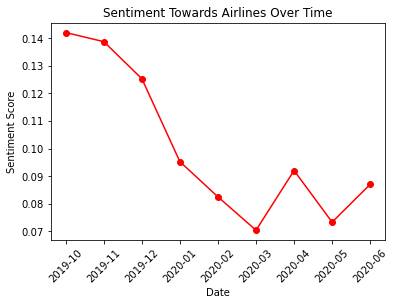

In [12]:
analyzer = SentimentIntensityAnalyzer()

# Compute sentiment score for each tweet
sentiment_scores = []
for text in airlines_tweets_df['cleaned_text']:
    sentiment_scores.append(analyzer.polarity_scores(text)['compound'])

airlines_tweets_df['sentiment_scores'] = sentiment_scores

# Calculate mean sentiment score of tweets per month
sentiment_series = airlines_tweets_df.groupby(airlines_tweets_df['date'].dt.strftime('%Y-%m'))['sentiment_scores'].mean()

plt.plot(sentiment_series, marker = 'o', color = 'red')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title("Sentiment Towards Airlines Over Time")
plt.xticks(rotation = 45)
plt.show()

***
<a id='B. Research Question #4'></a>
### B. Research Question #4
***

<a id='a. Frequency of Tweets about Airlines Over Time'></a>
#### a. Frequency of Tweets about Airlines Over Time
***

Finally, having established the *effects* to the industry, the potential *causes* of the change can be explored. First, the number of tweets related to airlines is graphed over time to determine the exact timeframe of the impact.

As seen below, the number of tweets related to airlines spiked in March 2020, when the societal effects of COVID-19 began to be realized.
***

In [13]:
# Adapted from https://docs.bokeh.org/en/latest/docs/gallery/range_tool.html

# Count tweets by day
daily_count = airlines_tweets_df.groupby(['date'], as_index = False)['tweet'].count()

dates = daily_count['date']

source = ColumnDataSource(data = dict(date = dates, close = daily_count['tweet']))

p = figure(plot_height = 300, plot_width = 800, tools = "xpan", toolbar_location = None,
           x_axis_type = "datetime", x_axis_location = "above", x_range = (dates[140], dates[185]))
p.line('date', 'close', source = source)
p.yaxis.axis_label = 'Number of Tweets'

select = figure(title = "Drag the middle and edges of the selection box to change the range above.",
                plot_height = 130, plot_width = 800, x_range = (dates[0], dates[len(dates) - 1]), y_range = p.y_range,
                x_axis_type="datetime", y_axis_type = None,
                tools = "", toolbar_location = None)

range_tool = RangeTool(x_range = p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

select.line('date', 'close', color = 'green', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)
select.toolbar.active_multi = range_tool

output_notebook(hide_banner = True)

show(column(p, select))

***
<a id='b. Topics of Tweets during Inception of COVID-19 Crisis'></a>
#### b. Topics of Tweets during Inception of COVID-19 Crisis
***

Using the result from above, the topics of tweets are examined between February and April 2020 to answer <a href='#Research Questions'>Research Question 4</a>. Topics emerge that include key terms such as coronavirus, bailout, and money. This suggests that perception of the airline industry was colored by these areas. In short, the change in perception of the airlines precipitated the changes in the industry.
***

In [14]:
#Break sentences into individual words
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# Select tweets between February and April 2020
covid_tweets_df = airlines_tweets_df[(airlines_tweets_df['date'] <= datetime(2020, 4, 1)) & 
                                    (airlines_tweets_df['date'] >= datetime(2020, 2, 1))]

covid_tweets_df = covid_tweets_df.reset_index()
covid_tweets_df = covid_tweets_df.drop(['index'], axis = 1)

#Transform tweets into lemmatized sentences
processed_docs = covid_tweets_df['text'].map(preprocess)

# Create a dictionary of documents
dictionary = corpora.Dictionary(processed_docs)

# Filter out tokens that appear in less than 10 documents (tweets) and in more than 1/2 of the documents
dictionary.filter_extremes(no_below = 10, no_above=0.5)

#Creates a corpus of words
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Default to 10 distinct topics
lda_model = LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [15]:
### Measure performance of topic model 
print('Performance of Topic Model: ')
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # A measure of how good the model is. The lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Performance of Topic Model: 

Perplexity:  -7.106043912710432

Coherence Score:  0.25569241261749875


In [16]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
display(vis)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.025844  0.015361       1        1  14.994562
0      0.054778  0.037930       2        1  12.585209
9     -0.011224  0.027950       3        1  12.518379
2      0.021531  0.029460       4        1   9.914808
8      0.044812  0.035651       5        1   9.836636
3      0.007291  0.027464       6        1   9.520106
4      0.040735  0.009743       7        1   8.069920
1     -0.051628 -0.064622       8        1   7.885460
6      0.056177 -0.123350       9        1   7.842443
7     -0.136630  0.004413      10        1   6.832475, topic_info=               Term         Freq        Total Category  logprob  loglift
1347        recline   926.000000   926.000000  Default  30.0000  30.0000
282            seat  1474.000000  1474.000000  Default  29.0000  29.0000
6          american  1082.000000  1082.000000  Default  28.0000  28.0000
170         airport   604.000000   604.000000  Default  27.0000  27.0000
167   international   350.000000   350.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
234          travel    35.530731   745.981079  Topic10  -5.2388  -0.3608
70            covid    28.740025   282.263031  Topic10  -5.4509   0.3989
948           space    28.051750   244.084290  Topic10  -5.4751   0.5200
266            need    28.938524   556.061035  Topic10  -5.4440  -0.2722
17             time    28.172398   601.123901  Topic10  -5.4708  -0.3770

[715 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1529      1  0.065058  abroad
1529      5  0.715634  abroad
1529      6  0.065058  abroad
1529      9  0.130115  abroad
589       1  0.192180  accept
...     ...       ...     ...
268       6  0.043833   youre
268       7  0.012524   youre
268       8  0.087667   youre
268       9  0.012524   youre
268      10  0.106453   youre

[3222 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 10, 3, 9, 4, 5, 2, 7, 8])

***
<a id='V. Conclusion'></a>
## V. Conclusion
***

The onset of the pandemic brought about numerous changes to the airline industry. Key airline metrics, such as the number of passengers, experienced sharp reversals in long-term trends. The changes to the industry were widespread, yet differences by location have emerged. Moreover, as sentiments have changed toward travel, the brand of the airline industry has been impacted. 

This report proposes that the changes in the airline industry were brought about in part by changes in perception of the industry as a whole. In other words, a decline in approval caused a decline in travel. 

There are a number of avenues of exploration to investigate this thesis further. The data can be broken down at a more granular level of city/airport to investigate localized changes. Health data could be incorporated to investigate the medical aspect of a global pandemic. Other forms of travel data could also be used to provide a comprehensive view of travel during the pandemic.

While researchers will be investigating the impact of the pandemic on society for years to come, it is evident that the airline industry has been fundamentally impacted in ways that will forever alter societal travel.
***